<a href="https://colab.research.google.com/github/msudhanshu10/Complete-Data-Science/blob/master/Hierarchial_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.cluster import AgglomerativeClustering ##Same as Hierarchial Clustering

import sklearn.metrics as sm


In [5]:
from google.colab import files
uploaded= files.upload()

Saving mtcars.csv to mtcars.csv


In [6]:
df= pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [8]:
x_cols=['mpg', 'disp', 'hp', 'wt']
y_col=['am']

X=df[x_cols]
y= df[y_col]

In [9]:
X.head()

,mpg,disp,hp,wt
0,21.0,160.0,110,2.620
1,21.0,160.0,110,2.875
2,22.8,108.0,93,2.320
3,21.4,258.0,110,3.215
4,18.7,360.0,175,3.440


In [10]:
y.head()

,am
0,1
1,1
2,1
3,0
4,0


## Using scipy to generate Dendrograms

In [11]:
z= linkage(X, 'ward') #ward is a linkage parameter

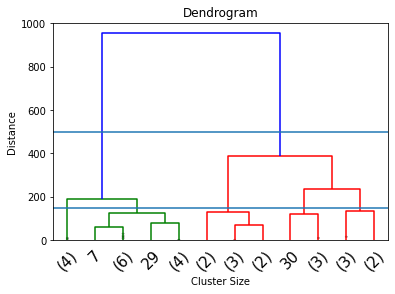

In [16]:
dendrogram(z, truncate_mode= 'lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted= True)
plt.title('Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)


## Generating Hierarchial Cluster

In [17]:
k= 2
hclustering= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage= 'ward')
hclustering.fit(X)

sm.accuracy_score(y, hclustering.labels_)

0.78125

In [18]:
hclustering.labels_

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [19]:
k= 2
hclustering= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage= 'complete')
hclustering.fit(X)

sm.accuracy_score(y, hclustering.labels_)

0.4375

In [20]:
k= 2
hclustering= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage= 'average')
hclustering.fit(X)

sm.accuracy_score(y, hclustering.labels_)

0.78125

In [22]:
k= 2
hclustering= AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage= 'average')
hclustering.fit(X)

sm.accuracy_score(y, hclustering.labels_)

0.71875

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [25]:
X.columns

Index(['mpg', 'disp', 'hp', 'wt'], dtype='object')

In [26]:
scaler.fit(X[['disp']])
X['disp']= scaler.transform(X[['disp']])

scaler.fit(X[['mpg']])
X['mpg']= scaler.transform(X[['mpg']])

scaler.fit(X[['hp']])
X['hp']= scaler.transform(X[['hp']])

scaler.fit(X[['wt']])
X['wt']= scaler.transform(X[['wt']])

X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,mpg,disp,hp,wt
0,0.451064,0.221751,0.204947,0.283048
1,0.451064,0.221751,0.204947,0.348249
2,0.527660,0.092043,0.144876,0.206341
3,0.468085,0.466201,0.204947,0.435183
4,0.353191,0.720629,0.434629,0.492713


In [27]:
z= linkage(X, 'ward') #ward is a linkage parameter

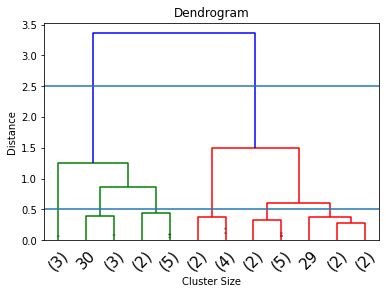

In [29]:
dendrogram(z, truncate_mode= 'lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted= True)
plt.title('Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=2.5)
plt.axhline(y=0.5)


## Generating Hierarchial Cluster

In [30]:
k= 2
hclustering= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage= 'ward')
hclustering.fit(X)

sm.accuracy_score(y, hclustering.labels_)

0.28125

In [31]:
hclustering.labels_

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [32]:
k= 2
hclustering= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage= 'complete')
hclustering.fit(X)

sm.accuracy_score(y, hclustering.labels_)

0.28125

In [33]:
k= 2
hclustering= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage= 'average')
hclustering.fit(X)

sm.accuracy_score(y, hclustering.labels_)

0.71875

In [34]:
k= 2
hclustering= AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage= 'average')
hclustering.fit(X)

sm.accuracy_score(y, hclustering.labels_)

0.71875